In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage.morphology import medial_axis, skeletonize
from fil_finder import FilFinder2D
import astropy.units as u

In [143]:
square = np.zeros((10, 10), dtype=np.uint8)
square[1:-1, 2:-2] = 1
square[2:-2, 3:-3] = 0
print(square)
med, dist = medial_axis(square, return_distance=True)
print(med, dist)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 0 0]
 [0 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0 0]
 [0 0 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[False False False False False False False False False False]
 [False False False  True  True  True  True False False False]
 [False False  True False False False False  True False False]
 [False False  True False False False False  True False False]
 [False False  True False False False False  True False False]
 [False False  True False False False False  True False False]
 [False False  True False False False False  True False False]
 [False False  True False False False False  True False False]
 [False False False  True  True  True  True False False False]
 [False False False False False False False False False False]] [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0

/Users/lix/opt/miniconda3/envs/lix/lib/python3.8/site-packages/fil_finder/filfinder2D.py:142: UserWarning: No beam width given. Using 0 pixels.
  warnings.warn("No beam width given. Using 0 pixels.")


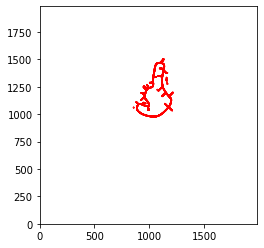

[0 1]


/Users/lix/opt/miniconda3/envs/lix/lib/python3.8/site-packages/fil_finder/filament.py:326: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


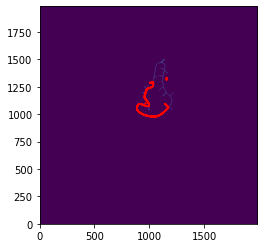

In [212]:
img = cv2.imread('./maps/gmapping/new_map.pgm', cv2.IMREAD_GRAYSCALE)

# fill(img, 0, 255)
thresh = 205
ret,thresh_img = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
# plt.imshow(thresh_img, cmap='gray')
can = cv2.Canny(thresh_img, 30, 200)
thresh_img = np.where(thresh_img == 255, 1, 0)
# plt.imshow(thresh_img)
fil = FilFinder2D(thresh_img, mask=thresh_img)
fil.preprocess_image(flatten_percent=100)
# plt.subplot(121)
# plt.imshow(fil.image.value, origin='lower')
# plt.title("Image")
# plt.subplot(122)
# plt.imshow(fil.flat_img.value, origin='lower')
# plt.title("Flattened Image")
# plt.tight_layout()
fil.medskel(verbose=True)
print(np.unique(thresh_img))

axis = fil.skeleton
# print(can)
axis = axis*255+can
axis_cut = axis[900:1500, 750:1400]
# axis_cut = thresh_img
plt.imshow(axis_cut)

# Save image wiht opencv
fil.analyze_skeletons(skel_thresh=u.pix*1, prune_criteria='length')
cv2.imwrite('./test.png', axis_cut)

plt.contour(fil.skeleton_longpath, colors='r')
plt.imshow(fil.skeleton, origin='lower')
# fil.analyze_skeletons(branch_thresh=5 * u.pix, prune_criteria='length')

# plt.imshow(fil.skeleton, origin='lower')
# plt.contour(fil.skeleton_longpath, colors='r')
# print(fil.skeleton_longpath)

[0 1]


True

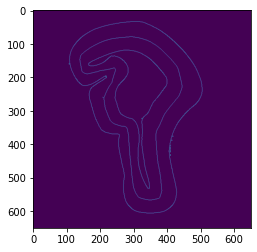

In [19]:
img = cv2.imread('./maps/gmapping/new_map.pgm', cv2.IMREAD_GRAYSCALE)

# fill(img, 0, 255)
thresh = 205
ret,thresh_img = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_img, cmap='gray')
can = cv2.Canny(thresh_img, 30, 200)
thresh_img = np.where(thresh_img == 255, 1, 0)
# plt.imshow(thresh_img)
print(np.unique(thresh_img))

axis = skeletonize(thresh_img)
# axis = medial_axis(thresh_img)
# print(can)
# axis = axis*255+can
axis = axis*255+can
axis_cut = axis[900:1550, 750:1400]
# axis_cut = thresh_img
plt.imshow(axis_cut)

# Save image wiht opencv
cv2.imwrite('./test.png', axis_cut)

In [7]:
from skimage.graph import pixel_graph
test_image = np.array([[0, 0, 0, 0, 0],
                       [0, 1, 1, 1, 0],
                       [0, 1, 0, 1, 1],
                       [0, 1, 1, 1, 0],
                       [0, 1, 1, 0, 0]])

In [147]:
binary_mask = test_image > 0
graph, nodes = pixel_graph(binary_mask, mask=None, edge_function=None, connectivity=2)
print(nodes)
print(graph[0,:].nonzero()[1])
fasdf
adj = graph[7,:].nonzero()[1]
print(graph.todense()[7])
# print(adj.astype(bool)[0])
indexes = nodes[adj]
# print(graph[,:])
# print(graph.__dict__)

[ 6  7  8 11 13 14 16 17 18 21 22]
[1 3]


NameError: name 'fasdf' is not defined

In [152]:
print(np.array([[j +5*i for j in range(5)] for i in range(5)]))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [8]:
import queue

class Graph:
    def __init__(self, image):
        binary_mask = image > 0
        self.graph, self.nodes = pixel_graph(binary_mask, mask=None, edge_function=None, connectivity=2)

    def adj(self, pixel_index):
        if pixel_index not in self.nodes:
            return np.array([])
        index = np.where(self.nodes == pixel_index)[0]
        adj_nonzero = self.graph[index,:].nonzero()[1]
        return self.nodes[adj_nonzero]

    def dist(self, pixel_index1, pixel_index2):
        if pixel_index1 not in self.nodes or pixel_index2 not in self.nodes:
            return np.inf
        index1 = np.where(self.nodes == pixel_index1)[0]
        index2 = np.where(self.nodes == pixel_index2)[0]
        return self.graph[index1, index2].item()

    def get_nonzero_node(self):
        return self.nodes[0]

graph = Graph(axis_cut)

parents = {}
q = queue.Queue()
first = graph.get_nonzero_node()
q.put(first)
visited = set({first})
missing_links = []

while not q.empty():
    node = q.get()

    for adj_node in graph.adj(node):
        if adj_node not in visited:
            parents[adj_node] = (node, adj_node, graph.dist(node, adj_node))
            q.put(adj_node)
            visited.add(adj_node)
        else:
            missing_links.append((node, adj_node, graph.dist(node, adj_node)))

# print(parents)
# print(missing_links)



In [10]:
import networkx as nx

G = nx.Graph()
G.add_weighted_edges_from(parents.values())
large_ring_link = None
large_path = None
total_weight = None
thresh = 1500
weights = []
for missing_link in missing_links:
    weight, path = nx.single_source_dijkstra(G, missing_link[0], missing_link[1])
    ring_weight = weight + missing_link[2]
    weights.append((ring_weight, missing_link))

    # if (total_weight == None and ring_weight > thresh) or (total_weight != None and ring_weight < total_weight and ring_weight > thresh):
    #     total_weight = ring_weight
    #     large_path = path
    #     large_ring_link = missing_link
# print()

def image_from_pixel_coords(img, coords):
    image = np.zeros_like(img)
    _, j_size = img.shape
    print(img.shape, j_size)
    for coor in coords:
        i, j = coor//j_size, coor%j_size
        if i < image.shape[0] and j < image.shape[1]:
            image[i, j] = 255
    return image

# path_image = image_from_pixel_coords(axis_cut, large_path)
# plt.plot(sorted(weights), 'o')
# plt.imshow(path_image)
# print(large_path, large_ring_link, total_weight)
# nodes = nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), label=parents.keys())
# print()
# nx.draw(G, with_labels=True)

(650, 650) 650


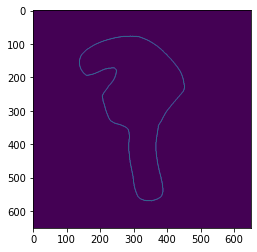

In [11]:
from sklearn.cluster import KMeans
X = np.array([weight for weight, _ in weights])
kmeans = KMeans(n_clusters=2).fit(X.reshape(-1,1))
first_cluster_selection = kmeans.labels_.astype(bool)
second_cluster_selection = ~first_cluster_selection
selections = [first_cluster_selection, second_cluster_selection]

max_average_selection_index = np.argmax([X[selection].mean() for selection in selections])

max_cluster_indexes = np.array(list(range(len(weights))))[first_cluster_selection]
trackline_weights_index = max_cluster_indexes[np.argmin(X[max_cluster_indexes])]
trackline_weight, trackline_link = weights[trackline_weights_index]

weight, path = nx.single_source_dijkstra(G, trackline_link[0], trackline_link[1])

path_image = image_from_pixel_coords(axis_cut, path)
plt.imshow(path_image)

# find cluster with largest mean weight



[205 254]
[[[1041  931]]

 [[1040  932]]

 [[1039  932]]

 ...

 [[1044  931]]

 [[1043  931]]

 [[1042  931]]]


/var/folders/v0/xs6thlxx1yndhpmqz70z0jwc0000gp/T/ipykernel_44345/3847815872.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


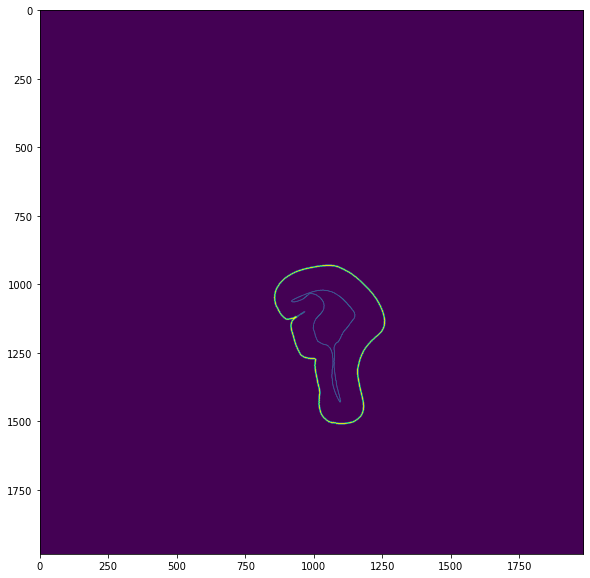

In [83]:
img = cv2.imread('./maps/gmapping/new_map.pgm')
# print(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.where(img == 0, 254, img)
thresh = 205
ret,thresh_img = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
print()
edged = cv2.Canny(thresh_img, 30, 200)
# plt.imshow(edged, cmap='gray')
# plt.imshow(img, cmap='gray')
print(np.unique(img))
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.fillPoly(img_contours, pts=contours,color=(255,255,255))
cv2.drawContours(img_contours, contours[9], -1, (255,0,0), 3)
print(contours[9])
# Create figure size 100x100
fig = plt.figure(figsize=(10,10))
# Add subplot with images and labels
plt.imshow(img_contours)
fig.show()
# print(contours)
# for contour in contours:
#     print(len(contour))
#     print(contour)


(1984, 1984) 1984


True

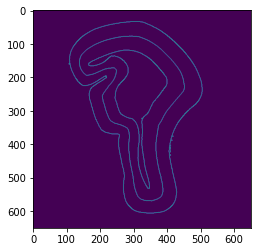

In [17]:
# import importlib
# import trajectory_predictor
# importlib.reload(trajectory_predictor)
from trajectory_predictor.utils.mapping import image_to_centerline

centerline = image_to_centerline('./maps/gmapping/new_map.pgm')

# path_image = image_from_pixel_coords(axis, centerline)
# plt.imshow(path_image)
# print(centerline)
path_image = image_from_pixel_coords(axis, centerline)

plt.imshow((path_image+can)[900:1550, 750:1400])
cv2.imwrite('./test3.png', (path_image+can)[900:1550, 750:1400])